## **Day 07 of 30 days Data Analysis**

### ***To dive deeper into patterns and discover time-based and relation insights in sales data.***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\datasets\\SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


### ***Sales Distribution by Hour***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3480\2631860051.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"]= pd.to_datetime(df["Time"]).dt.hour


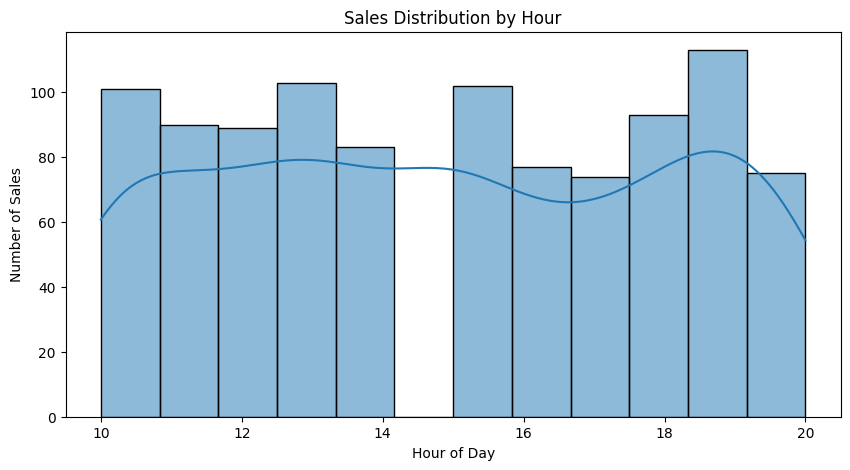

In [3]:
df["Hour"]= pd.to_datetime(df["Time"]).dt.hour

plt.figure(figsize= (10,5))
sns.histplot(df["Hour"], bins= 12, kde= True)
plt.title("Sales Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sales")
plt.show()

### ***Insight:***

*- There is **the least** amount of shopping **between 4pm and 6pm** and **the most** shopping **between 6pm and 8pm**.*

### ***Custom Question and Visual Answers***

Text(0.5, 1.0, 'Total Sales by Time Period')

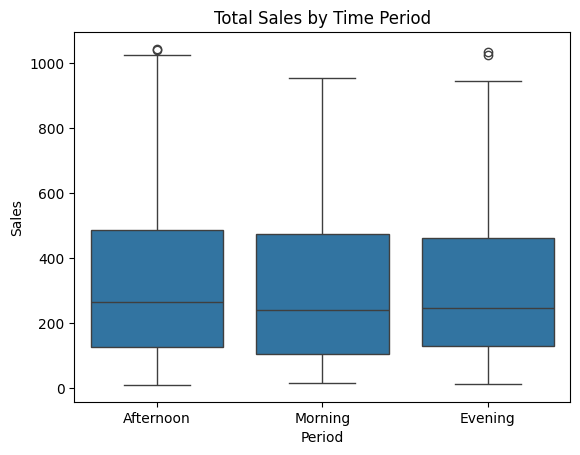

In [4]:
def get_time_period(hour):
    if hour < 12 :
        return "Morning"
    elif hour < 17 :
        return "Afternoon"
    else:
         return "Evening"
    
df["Period"] = df["Hour"].apply(get_time_period)

sns.boxplot(data= df, x= "Period", y= "Sales")
plt.title("Total Sales by Time Period")

### ***Insight:***

*- Most sales are in the **Evening**.*

*- Q: Does the time of day affect the amount of purchases?*

*- A: Not much.*

*- Q: Does payment type influence sales amount?*

*- A: No.*

Text(0.5, 1.0, 'Rating vs Total Sales by Payment Method')

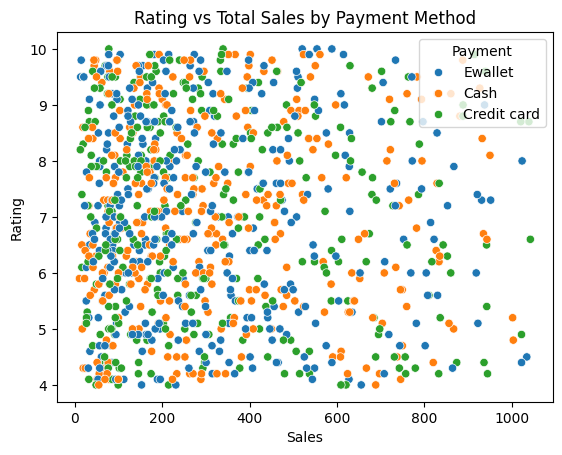

In [5]:
sns.scatterplot(data= df, x= "Sales", y= "Rating", hue= "Payment")
plt.title("Rating vs Total Sales by Payment Method")

### ***Exploratory Q&A***

*- Q: Is there a relationship between customer satisfaction (Rating) and total sales?*

*- A: No significant correlation found. The scatterplot shows a random distribution, and the correlation coefficient is very low.*

*- Q: Is there a relationship?*

*- A: No there isn't.*

*- Q: How is the dispersion?*

*- A: In general, the graph is scattered.*

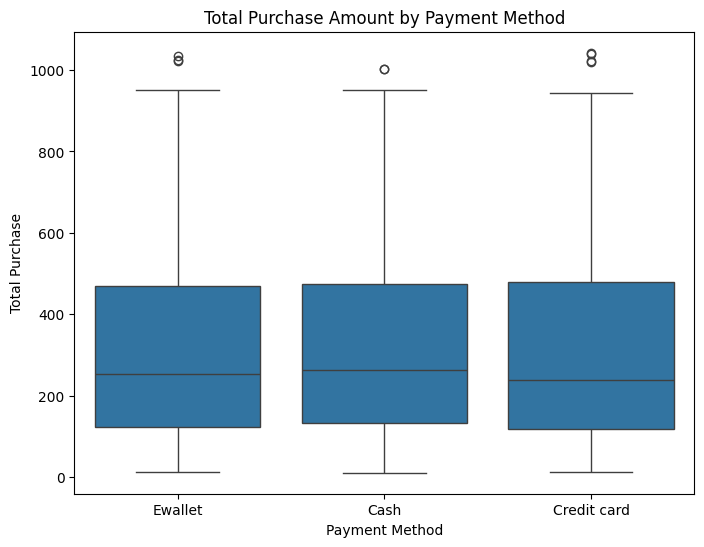

In [6]:
plt.figure(figsize= (8,6))
sns.boxplot(data= df, x= "Payment", y= "Sales")
plt.title("Total Purchase Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Purchase")
plt.show()

*- Q: Does the payment method affect the final purchase amount?*

*- A: Based on the boxplot, the median and spread of purchase amounts are vert similar across all payment method. Therefore, payment method does not appear to significantly affect the total purchase.*

### ***Correlation Matrix***

In [7]:
# df["gross margin percentage"].value_counts()
df= df.drop(columns= ["gross margin percentage"])

*Note: The column `gross margin percentage` contains only a single unique value (`4.76`) across all records. Therefore, it holds no analytical value and will be excluded from further analysis.*

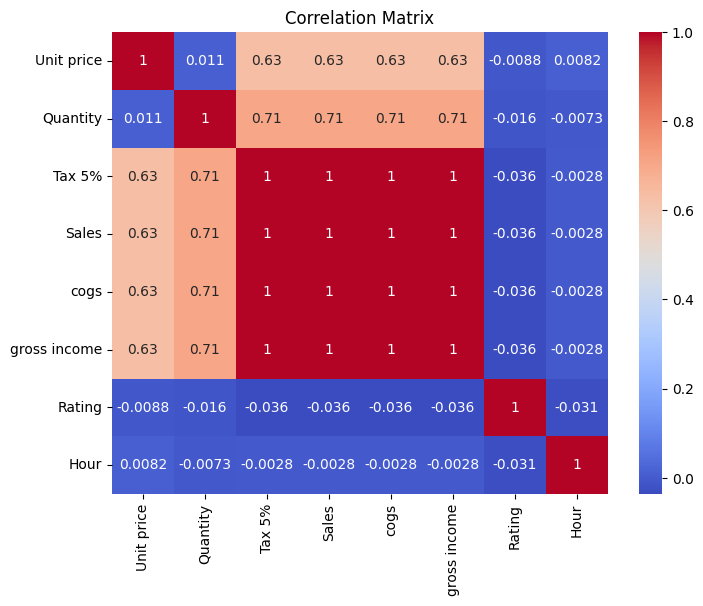

In [8]:
nueric_df= df.select_dtypes(include= ["number"])

plt.figure(figsize= (8,6))
sns.heatmap(nueric_df.corr(), annot= True, cmap= "coolwarm")
plt.title("Correlation Matrix")
plt.show()

### ***Insights:***

*- A **strong positive correlation (0.71)** exists between `Quantity` and `Tax 5%`, `Sales`, and `Gross Income`. This suggests higher quantity directly impacts revenue and tax — as expected.*
  
*- `Unit Price` has a **moderate correlation (~0.63)** with key revenue metrics. Higher unit prices contribute to increased total sales.*

*- Surprisingly, **`Customer Rating` has very low correlation (~0.0)** with financial metrics, indicating that customer satisfaction might not directly depend on the purchase amount.*

*- **Time-based variables (`Hour`, `Day`, `Month`)** show no significant correlation with revenue, implying sales patterns might be distributed evenly or need separate time-series analysis.*

### ***Final Summary***

*- Evening time shows the highest number of purchases, suggesting it’s the most active sales period. However, the time of purchase does not significantly impact the total purchase amount.*

*- Payment methods (Credit Card, Ewallet, Cash) do not affect the amount spent — their distributions are similar.*

*- Customer Ratings are not strongly correlated with total sales or revenue, implying satisfaction may depend on non-financial factors.*

*- The strongest positive correlations were observed between `Quantity`, `Total`, and `Gross Income`, which is expected in retail datasets.*